In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
# from image_loader import image_transforms
# from image_loader import images_from_dir
# from image_loader import image_data_loader
from image_loader import dir_loader_stack

# Model Functions
from resnet50 import Resnet50_pretrained

from model_helpers import train
from model_helpers import predict


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

In [2]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = 'dogImages/'

# Set subfolders for train, val & test
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [3]:
train_loader = dir_loader_stack(train_dir, img_size,
                               batch_size, num_workers, True)

val_loader = dir_loader_stack(val_dir, img_size,
                               batch_size, num_workers)

test_loader = dir_loader_stack(test_dir, img_size,
                               batch_size, num_workers)


In [4]:
data_loaders = {
    'train':train_loader,
    'valid':val_loader,
    'test':test_loader,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(126)


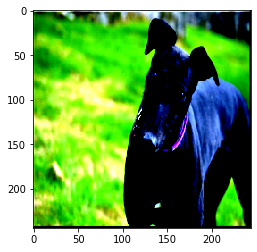

In [5]:
# Check how images are loaded
images, labels = next(iter(train_loader))

# Display image and label
plt.imshow(images[0].permute(1, 2, 0))
print(labels[8])

In [6]:
# Model Parms
num_classes = 133
device = 'cuda'

In [7]:
# create model from object

In [8]:
res_model = Resnet50_pretrained(num_classes)

In [9]:
res_model = res_model.build()

In [10]:
# Train Model

In [11]:
# Train Params
n_epochs = 1
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [12]:
# model = train(res_model, n_epochs, data_loaders, optimizer,
#                     criterion, device, save_path)

In [13]:
# refactor to functions

In [20]:
# train the model
# model_transfer = res_model.train(n_epochs, data_loaders, optimizer_transfer, criterion_transfer, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
res_model.load_state_dict(torch.load('model_transfer_dog_breeds.pt'))
res_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
# getimages image folder
images = glob.glob("images/*")

In [22]:
for image in images:
    predict(res_model,image,device)

92
36
54
56
131
95
23
55
95
71
95
48
100
37
77
48
100
6
